**Setting up environment and preparing data**

Loading libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Loading the IMDB Dataset

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding reviews to text

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Encoding the integer sequences via multi-hot encoding

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Splitting training and test set

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Comparing validation and test accuracy of models with one, two and three hidden layers**

Simple model with one hidden layer

In [6]:
model= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_one=model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.5204 - accuracy: 0.7811 - val_loss: 0.4135 - val_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3474 - accuracy: 0.8936 - val_loss: 0.3468 - val_accuracy: 0.8699
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2751 - accuracy: 0.9139 - val_loss: 0.3023 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2323 - accuracy: 0.9247 - val_loss: 0.2906 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2027 - accuracy: 0.9360 - val_loss: 0.2809 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1798 - accuracy: 0.9437 - val_loss: 0.2768 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1632 - accuracy: 0.9497 - val_loss: 0.2867 - val_accuracy: 0.8832
Epoch 8/20
30

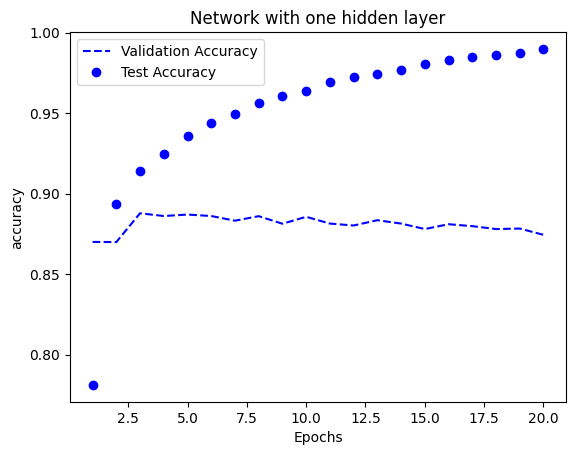

In [7]:
val_accuracy=history_one.history["val_accuracy"]
train_accuracy=history_one.history["accuracy"]
epochs=range(1,21)
plt.plot(epochs, val_accuracy, "b--", label="Validation Accuracy")
plt.plot(epochs, train_accuracy, "bo", label="Test Accuracy")
plt.title("Network with one hidden layer")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Model with 2 hidden layers (Initial Example from Class)

In [8]:
model2= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_two=model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.5362 - accuracy: 0.7861 - val_loss: 0.4345 - val_accuracy: 0.8312
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3378 - accuracy: 0.8904 - val_loss: 0.3235 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2515 - accuracy: 0.9173 - val_loss: 0.2926 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2030 - accuracy: 0.9342 - val_loss: 0.3085 - val_accuracy: 0.8750
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1684 - accuracy: 0.9452 - val_loss: 0.2764 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1439 - accuracy: 0.9537 - val_loss: 0.2812 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1210 - accuracy: 0.9639 - val_loss: 0.2932 - val_accuracy: 0.8826
Epoch 8/20
30

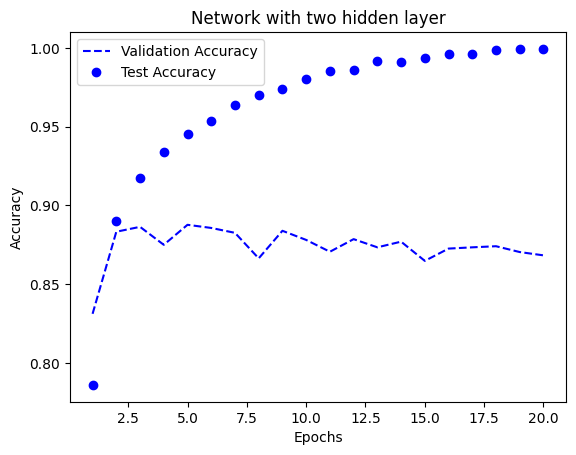

In [9]:
val_accuracy_two=history_two.history["val_accuracy"]
train_accuracy_two=history_two.history["accuracy"]
epochs_two=range(1,21)
plt.plot(epochs_two, val_accuracy_two, "b--", label="Validation Accuracy")
plt.plot(epochs_two, train_accuracy_two, "bo", label="Test Accuracy")
plt.title("Network with two hidden layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model with 3 hidden layers

In [10]:
model3= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_3=model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5849 - accuracy: 0.7267 - val_loss: 0.4873 - val_accuracy: 0.8176
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3989 - accuracy: 0.8863 - val_loss: 0.3764 - val_accuracy: 0.8693
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2783 - accuracy: 0.9183 - val_loss: 0.3002 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2043 - accuracy: 0.9345 - val_loss: 0.2966 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1653 - accuracy: 0.9465 - val_loss: 0.3011 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1361 - accuracy: 0.9578 - val_loss: 0.3022 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1132 - accuracy: 0.9659 - val_loss: 0.3184 - val_accuracy: 0.8835
Epoch 8/20
30

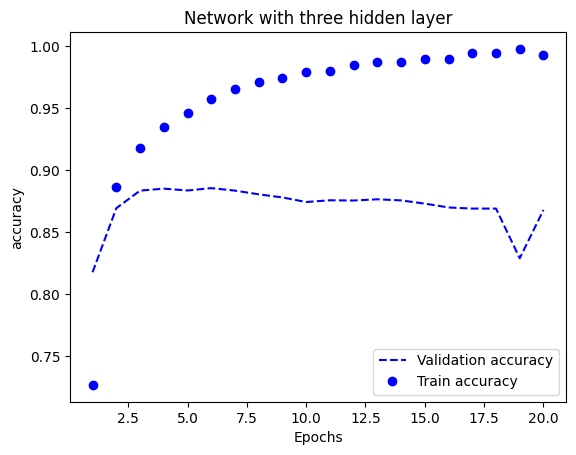

In [11]:
val_accuracy_3=history_3.history["val_accuracy"]
train_accuracy_3=history_3.history["accuracy"]
epochs_3=range(1,21)
plt.plot(epochs_3, val_accuracy_3, "b--", label="Validation accuracy")
plt.plot(epochs_3, train_accuracy_3, "bo", label="Train accuracy")
plt.title("Network with three hidden layer")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

The training accuracy increases as the number of epochs increase irrespective of the number of layers we use. The validation accuracy on the contrary is sensitive to the number of layers of the model. It increases along with training accuracy until the eigth epoch for the model with one layer, and then starts decreasing. This divergence occurs at five epochs in the model with two layers and at three epochs in the model with three layers.We can conclude that the number of epochs it would take the model to overfit is related to the complexity of the the model. More complex models tend to overfit faster than simpler ones.

**Comparing models with same layers(two) and different hidden units (16, 32 and 64)**

Two layers and 32 units

In [13]:
model2_32= keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history2_32=model2_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.5153 - accuracy: 0.7681 - val_loss: 0.3716 - val_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3133 - accuracy: 0.8901 - val_loss: 0.3178 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2348 - accuracy: 0.9175 - val_loss: 0.2803 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1888 - accuracy: 0.9343 - val_loss: 0.2771 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1613 - accuracy: 0.9448 - val_loss: 0.3116 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1332 - accuracy: 0.9569 - val_loss: 0.2974 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1126 - accuracy: 0.9639 - val_loss: 0.4047 - val_accuracy: 0.8572
Epoch 8/20
30

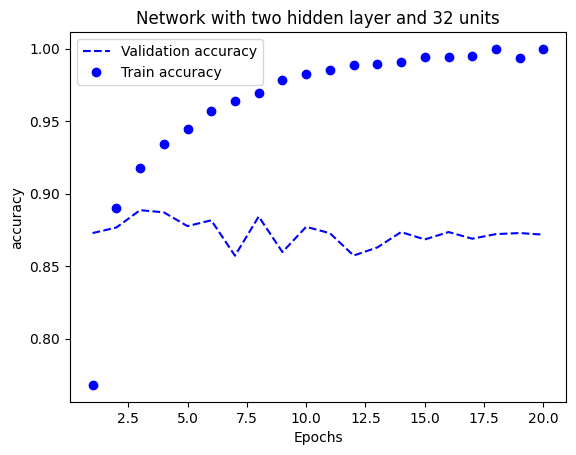

In [14]:
val_accuracy_232=history2_32.history["val_accuracy"]
train_accuracy_232=history2_32.history["accuracy"]
epochs_232=range(1,21)
plt.plot(epochs_232, val_accuracy_232, "b--", label="Validation accuracy")
plt.plot(epochs_232, train_accuracy_232, "bo", label="Train accuracy")
plt.title("Network with two hidden layer and 32 units")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


Two layers and 64 units

In [15]:
model2_64= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history2_64=model2_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.5225 - accuracy: 0.7428 - val_loss: 0.3569 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 3s 86ms/step - loss: 0.3022 - accuracy: 0.8850 - val_loss: 0.3113 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 7s 224ms/step - loss: 0.2315 - accuracy: 0.9128 - val_loss: 0.2728 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1853 - accuracy: 0.9311 - val_loss: 0.2779 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1581 - accuracy: 0.9409 - val_loss: 0.2883 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1245 - accuracy: 0.9553 - val_loss: 0.4675 - val_accuracy: 0.8371
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1013 - accuracy: 0.9653 - val_loss: 0.3972 - val_accuracy: 0.8656
Epoch 8/20
3

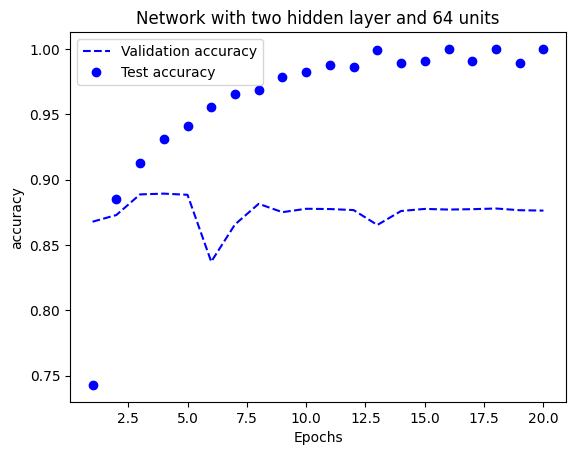

In [16]:
val_accuracy_264=history2_64.history["val_accuracy"]
train_accuracy_264=history2_64.history["accuracy"]
epochs_264=range(1,21)
plt.plot(epochs_264, val_accuracy_264, "b--", label="Validation accuracy")
plt.plot(epochs_264, train_accuracy_264, "bo", label="Test accuracy")
plt.title("Network with two hidden layer and 64 units")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

**Model with two layers and different loss and activation functions**

Model with MSE loss function

In [18]:
model2_mse= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history2_mse=model2_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.1826 - accuracy: 0.7668 - val_loss: 0.1413 - val_accuracy: 0.8265
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1066 - accuracy: 0.8849 - val_loss: 0.1099 - val_accuracy: 0.8593
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0788 - accuracy: 0.9127 - val_loss: 0.0902 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0637 - accuracy: 0.9301 - val_loss: 0.0857 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0551 - accuracy: 0.9399 - val_loss: 0.0834 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0479 - accuracy: 0.9483 - val_loss: 0.0836 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0401 - accuracy: 0.9588 - val_loss: 0.0839 - val_accuracy: 0.8855
Epoch 8/20
30

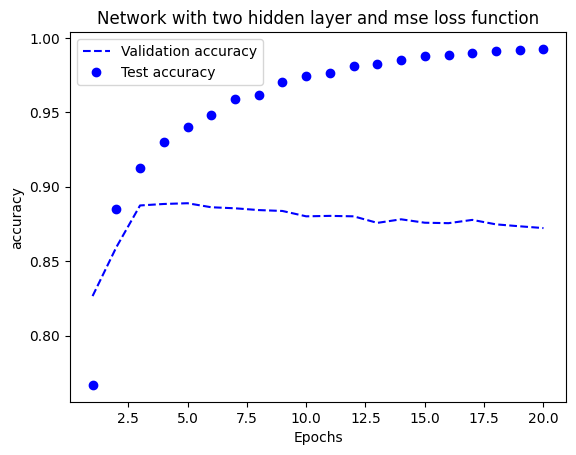

In [19]:
val_accuracy_mse=history2_mse.history["val_accuracy"]
train_accuracy_mse=history2_mse.history["accuracy"]
epochs_mse=range(1,21)
plt.plot(epochs_mse, val_accuracy_mse, "b--", label="Validation accuracy")
plt.plot(epochs_mse, train_accuracy_mse, "bo", label="Test accuracy")
plt.title("Network with two hidden layer and mse loss function")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Training model with 2 hidden layers and tanh activation

In [21]:
model2_tanh= keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model2_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_tanh=model2_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5052 - accuracy: 0.7941 - val_loss: 0.4010 - val_accuracy: 0.8411
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3053 - accuracy: 0.8957 - val_loss: 0.2966 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2223 - accuracy: 0.9237 - val_loss: 0.3132 - val_accuracy: 0.8674
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1755 - accuracy: 0.9381 - val_loss: 0.2731 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1400 - accuracy: 0.9536 - val_loss: 0.3213 - val_accuracy: 0.8759
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1135 - accuracy: 0.9622 - val_loss: 0.3340 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0916 - accuracy: 0.9714 - val_loss: 0.3444 - val_accuracy: 0.8800
Epoch 8/20
30

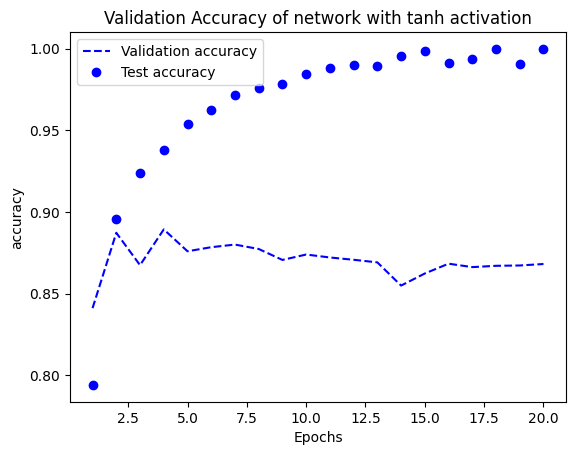

In [22]:
val_accuracy_tanh=history_tanh.history["val_accuracy"]
train_accuracy_tanh=history_tanh.history["accuracy"]
epochs_tanh=range(1,21)
plt.plot(epochs_tanh, val_accuracy_tanh, "b--", label="Validation accuracy")
plt.plot(epochs_tanh, train_accuracy_tanh, "bo", label="Test accuracy")
plt.title("Validation Accuracy of network with tanh activation")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

**Implementing dropout to improve model performance**

In [32]:
model_dropout= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(1, activation="sigmoid")
])
model_dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout=model_dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5980 - accuracy: 0.6859 - val_loss: 0.4701 - val_accuracy: 0.8474
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4554 - accuracy: 0.8155 - val_loss: 0.3690 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3691 - accuracy: 0.8625 - val_loss: 0.3334 - val_accuracy: 0.8672
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3109 - accuracy: 0.8919 - val_loss: 0.2893 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2628 - accuracy: 0.9086 - val_loss: 0.2753 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2297 - accuracy: 0.9235 - val_loss: 0.2720 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2006 - accuracy: 0.9329 - val_loss: 0.2767 - val_accuracy: 0.8903
Epoch 8/20
30

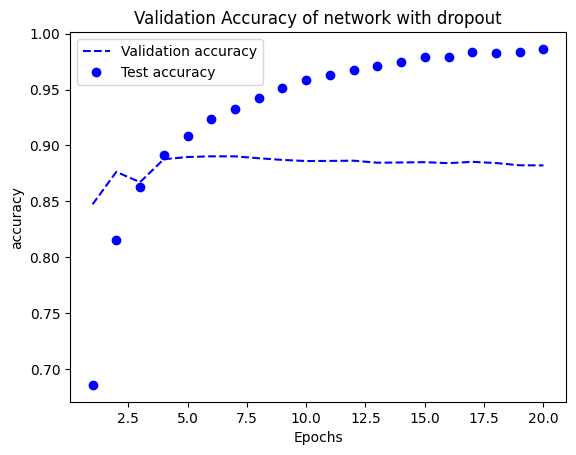

In [33]:
val_accuracy_dropout=history_dropout.history["val_accuracy"]
train_accuracy_dropout=history_dropout.history["accuracy"]
epochs_dropout=range(1,21)
plt.plot(epochs_dropout, val_accuracy_dropout, "b--", label="Validation accuracy")
plt.plot(epochs_dropout, train_accuracy_dropout, "bo", label="Test accuracy")
plt.title("Validation Accuracy of network with dropout")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

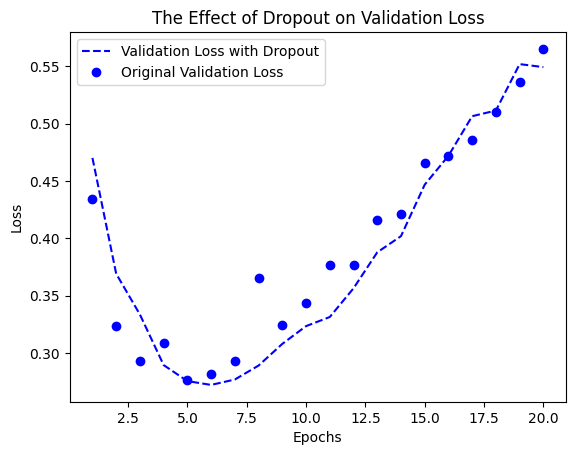

In [36]:
val_loss_dropout=history_dropout.history["val_loss"]
val_loss_original=history_two.history["val_loss"]
epochs_dropout=range(1,21)
plt.plot(epochs_dropout, val_loss_dropout, "b--", label="Validation Loss with Dropout")
plt.plot(epochs_dropout, val_loss_original, "bo", label="Original Validation Loss")
plt.title("The Effect of Dropout on Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The model with dropout seems to be an improvement since the lowest validation loss reachead has improved